<a href="https://colab.research.google.com/github/shubh12et1062/Self_learn/blob/master/XGBoost_early_stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
files.upload()

Saving diabetes.data.csv to diabetes.data (1).csv


{'diabetes.data.csv': b'6,148,72,35,0,33.6,0.627,50,1\n1,85,66,29,0,26.6,0.351,31,0\n8,183,64,0,0,23.3,0.672,32,1\n1,89,66,23,94,28.1,0.167,21,0\n0,137,40,35,168,43.1,2.288,33,1\n5,116,74,0,0,25.6,0.201,30,0\n3,78,50,32,88,31.0,0.248,26,1\n10,115,0,0,0,35.3,0.134,29,0\n2,197,70,45,543,30.5,0.158,53,1\n8,125,96,0,0,0.0,0.232,54,1\n4,110,92,0,0,37.6,0.191,30,0\n10,168,74,0,0,38.0,0.537,34,1\n10,139,80,0,0,27.1,1.441,57,0\n1,189,60,23,846,30.1,0.398,59,1\n5,166,72,19,175,25.8,0.587,51,1\n7,100,0,0,0,30.0,0.484,32,1\n0,118,84,47,230,45.8,0.551,31,1\n7,107,74,0,0,29.6,0.254,31,1\n1,103,30,38,83,43.3,0.183,33,0\n1,115,70,30,96,34.6,0.529,32,1\n3,126,88,41,235,39.3,0.704,27,0\n8,99,84,0,0,35.4,0.388,50,0\n7,196,90,0,0,39.8,0.451,41,1\n9,119,80,35,0,29.0,0.263,29,1\n11,143,94,33,146,36.6,0.254,51,1\n10,125,70,26,115,31.1,0.205,41,1\n7,147,76,0,0,39.4,0.257,43,1\n1,97,66,15,140,23.2,0.487,22,0\n13,145,82,19,110,22.2,0.245,57,0\n5,117,92,0,0,34.1,0.337,38,0\n5,109,75,26,0,36.0,0.546,60,0\n3,158,

In [0]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

import pandas as pd


In [0]:
dataset = pd.read_csv("diabetes.data.csv")

Accuracy: 76.38%


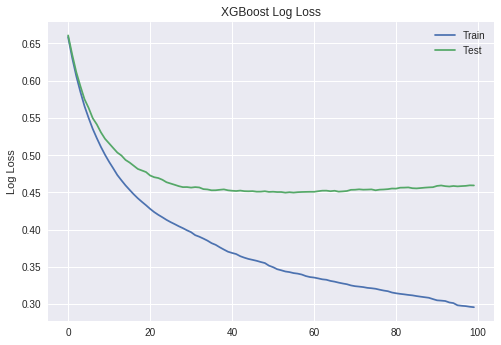

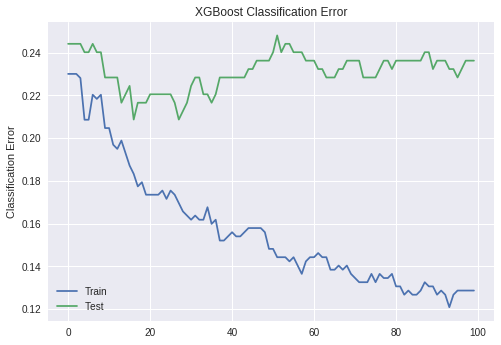

In [8]:
# split data into X and y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

Two plots are created. The first shows the logarithmic loss of the XGBoost model for each epoch on the training and test datasets.

The second plot shows the classification error of the XGBoost model for each epoch on the training and test datasets.

From reviewing the logloss plot, it looks like there is an opportunity to stop the learning early, perhaps somewhere around epoch 20 to epoch 40.

We see a similar story for classification error, where error appears to go back up at around epoch 40.

**Early Stopping With XGBoost**

In [9]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660861
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634972
[2]	validation_0-logloss:0.611351
[3]	validation_0-logloss:0.592642
[4]	validation_0-logloss:0.575132
[5]	validation_0-logloss:0.563485
[6]	validation_0-logloss:0.549664
[7]	validation_0-logloss:0.541282
[8]	validation_0-logloss:0.530643
[9]	validation_0-logloss:0.521952
[10]	validation_0-logloss:0.515799
[11]	validation_0-logloss:0.509574
[12]	validation_0-logloss:0.503468
[13]	validation_0-logloss:0.499532
[14]	validation_0-logloss:0.493536
[15]	validation_0-logloss:0.490027
[16]	validation_0-logloss:0.485746
[17]	validation_0-logloss:0.481438
[18]	validation_0-logloss:0.479345
[19]	validation_0-logloss:0.477251
[20]	validation_0-logloss:0.472621
[21]	validation_0-logloss:0.470315
[22]	validation_0-logloss:0.469204
[23]	validation_0-logloss:0.466885
[24]	validation_0-logloss:0.46358
[25]	validation_0-logloss:0.461839
[26]	validation_0-logloss:0.46010

We can see that the model stopped training at epoch 53 (close to what we expected by our manual judgment of learning curves) and that the model with the best loss was observed at epoch 32.

It is generally a good idea to select the early_stopping_rounds as a reasonable function of the total number of training epochs (10% in this case) or attempt to correspond to the period of inflection points as might be observed on plots of learning curves.